# Data Visualization with ggplot2

R has several ways to create plots, ggplot2 is a one great way!

**ggplot2** is one the core libraries packaged in **tidyverse**

Let's install **tidyverse** using these basic commands to install packages:

```R
# INSTALL PACKAGE ####
install.packages("tidyverse")
# USE PACKAGE ####
library(tidyverse)
```

In [1]:
# INSTALL PACKAGE ####
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//Rtmp6t46Yn/downloaded_packages


In [2]:
# USE PACKAGE ####
library(tidyverse)
# https://tidyverse.tidyverse.org/reference/tidyverse_conflicts.html - ignore

── Attaching packages ─────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
# this dataset is already contained in R so we didn't have to download it
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [5]:
#view(mpg) doesn't work in Jupyter

Some of the variables in mpg are:

displ, short for displacement, a car’s engine size, in liters.

hwy, a car’s fuel efficiency on the highway, in miles per gallon (mpg). 
A car with a low fuel efficiency consumes more fuel than a car with a high 
fuel efficiency when they travel the same distance.

## Creating a ggplot
To plot mpg, run the below code to put displ on the x-axis and hwy on the y-axis:

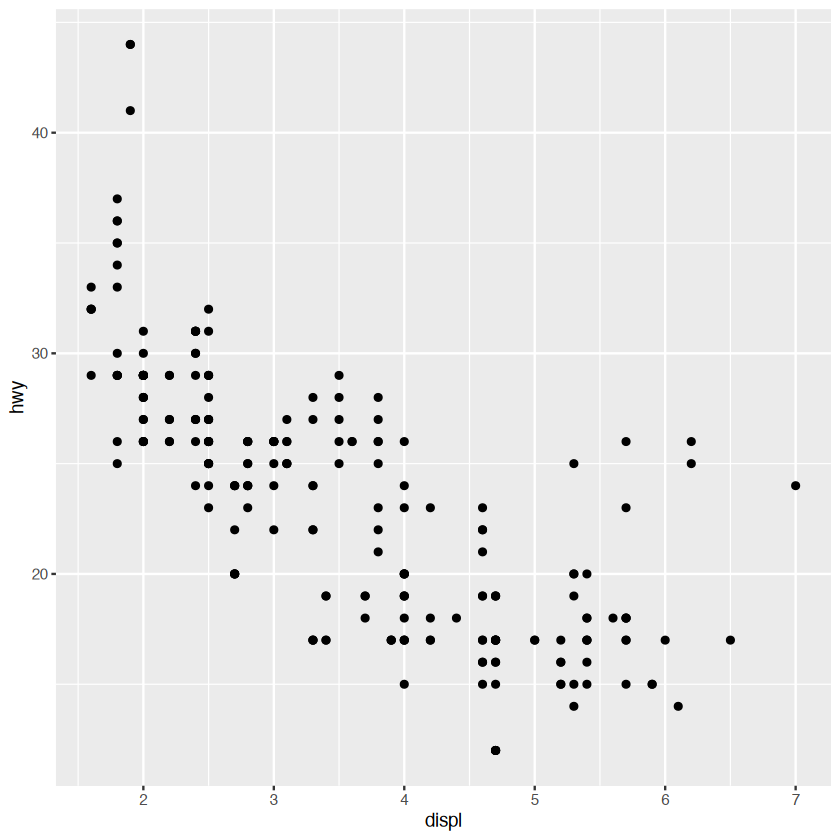

In [6]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

The plot shows a negative relationship between engine size (displ) and fuel efficiency (hwy). In other words, cars with big engines use more fuel.

You begin a plot with the function name - ```ggplot()```. 

ggplot() creates a coordinate system where layers can be added to. 

One of the the first arguments of ggplot() is the dataset used in the graph. So, ggplot(data = mpg) creates an empty graph, but it’s not very interesting.

Next complete your graph by adding more layers to the ```ggplot()``` function. You can use the function ```geom_point()``` which adds a layer of points to your plot. This creates a scatterplot. 

ggplot2 comes with many geom functions that each add a different type of layer to a plot. 

Each geom function in ggplot2 takes a mapping argument. This defines how variables in your dataset are mapped to visual properties. The mapping argument is always paired with aes(), and the x and y arguments of aes() specify which variables to map to the x- and y-axes. ggplot2 looks for the mapped variable in the data argument, in this case, mpg.

Review these [ggplot functions](https://ggplot2.tidyverse.org/reference/)

## A Graphing Template
Here's a reusable template for making graphs with ggplot2. To make a graph, replace the bracketed sections in the following code with a dataset, a geom function, or a collection of mappings:

```R
ggplot(data = <DATA>) +
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

## Aesthetic Mappings
*The greatest value of a picture is when it forces us to notice what we never expected to see. ~ John Tukey*

You can add a third variable, like class, to a two-dimensional scatterplot by mapping it to an aesthetic. An aesthetic is a visual property of the objects in your plot. Aesthetics include things like the size, the shape, or the color of your points. 

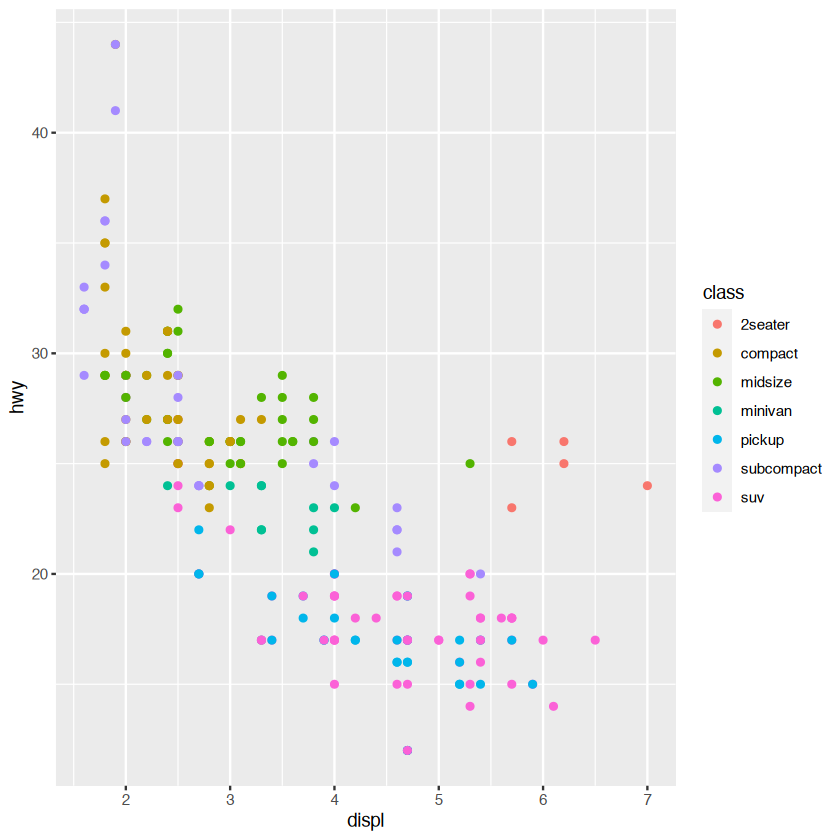

In [9]:
#add an aesthetic
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

Warning message:
“Using size for a discrete variable is not advised.”


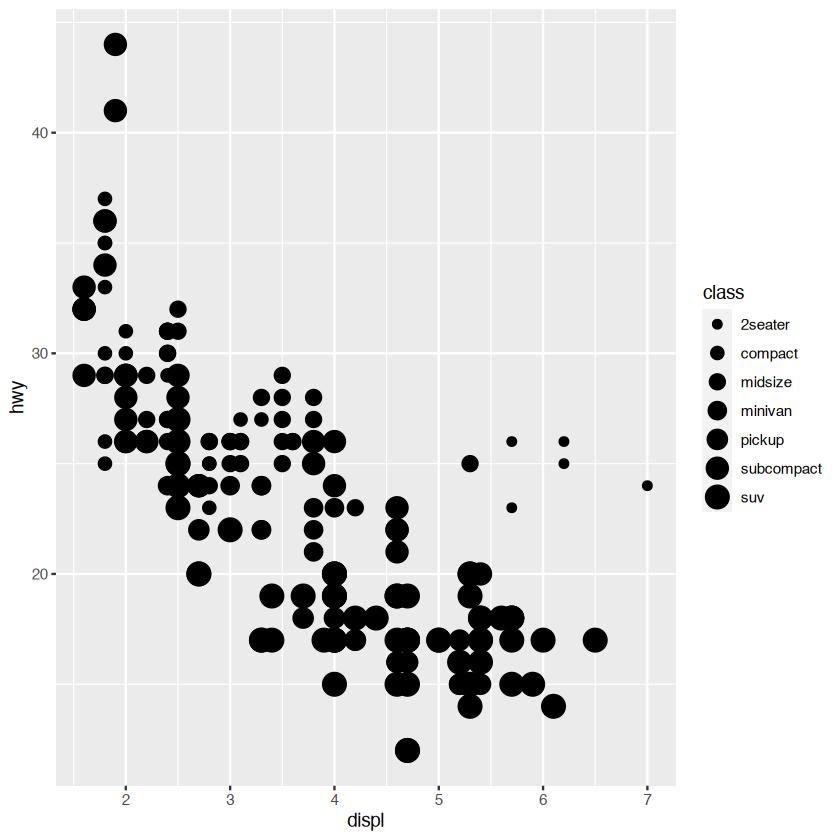

In [10]:
# Warning: Using size for a discrete variable is not advised.

ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, size = class))


Warning message:
“Using alpha for a discrete variable is not advised.”


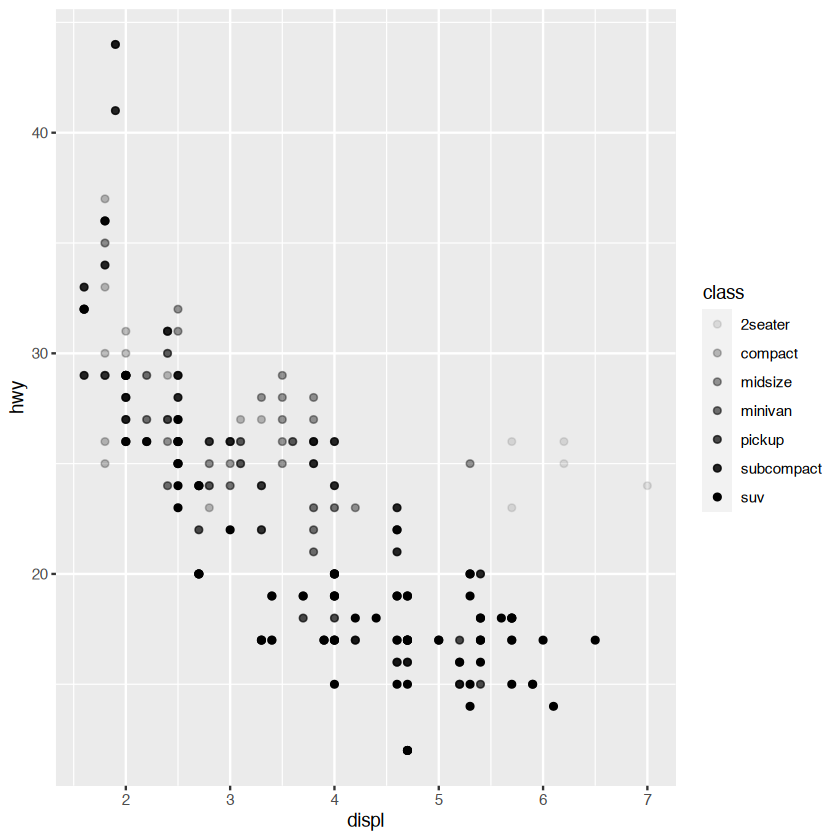

In [12]:
#You could map class to the alpha aesthetic, which controls the transparency of the points, or the shape of the points:
# alpha = class
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


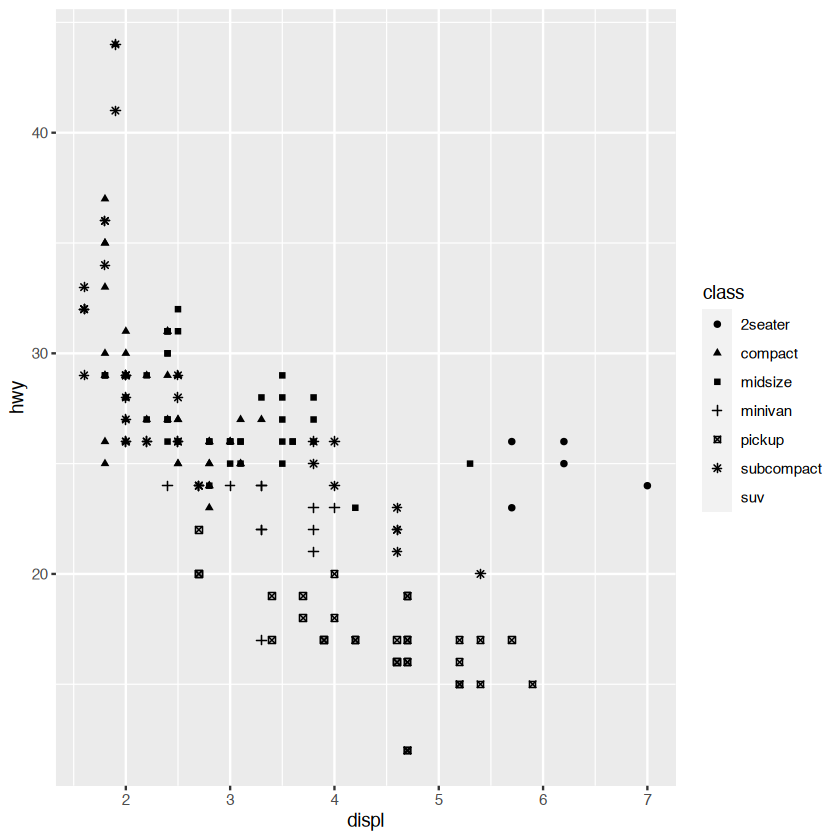

In [13]:
# shape = class
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

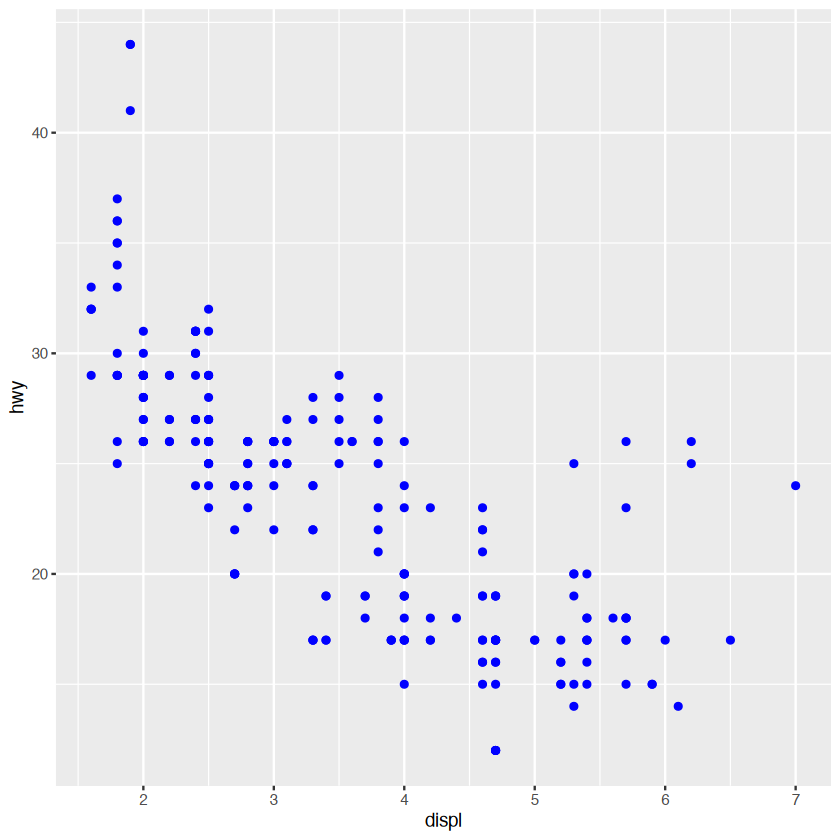

In [14]:
#You can also set the aesthetic properties of your geom manually. For example, we can make all of the points in our plot blue:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

## Facets

One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.

To facet your plot by a single variable, use facet_wrap(). The first argument of facet_wrap() should be a formula, which you create with ~ followed by a variable name (here “formula” is the name of a data structure in R, not a synonym for “equation”). The variable that you pass to facet_wrap() should be discrete:

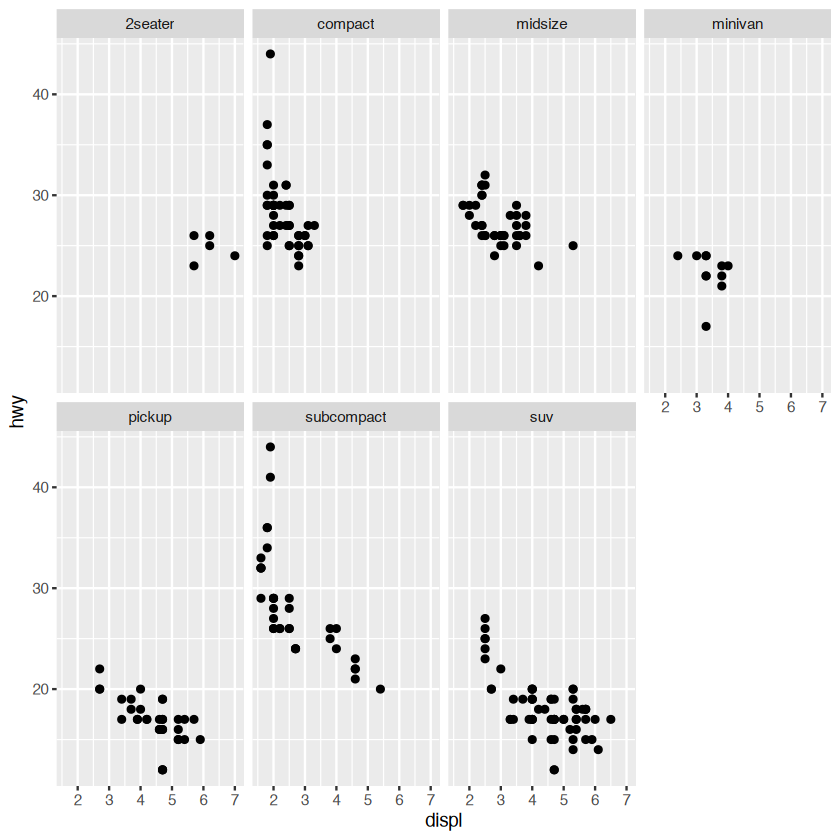

In [15]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 2)

## Geometric Objects

How are these two plots different?

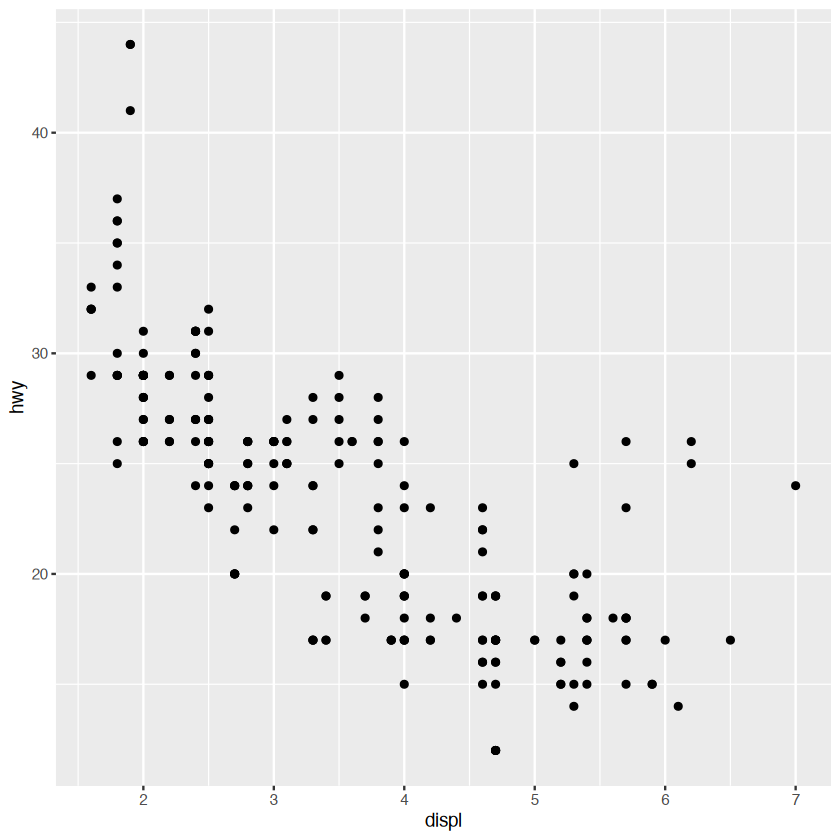

In [16]:
# geom_point
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



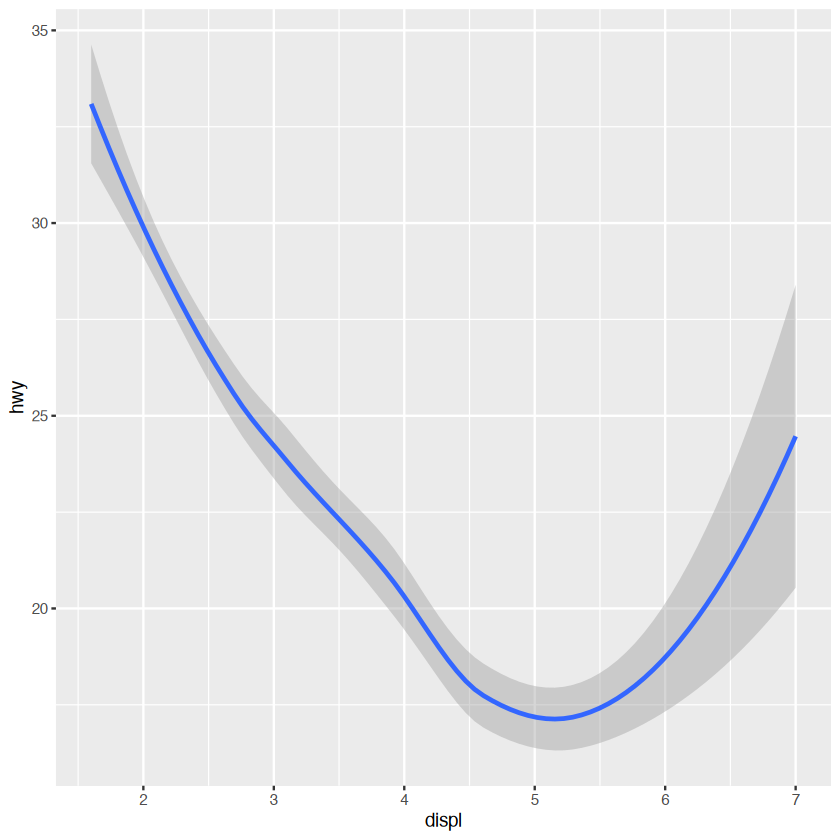

In [17]:
# geom_smooth
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

Both plots contain the same x variable and the same y variable, and both describe the same data. But the plots are not identical. Each plot uses a different visual object to represent the data. In ggplot2 syntax, we say that they use different geoms.

A geom is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and so on. Scatterplots break the trend; they use the point geom. As we see in the preceding plots, you can use different geoms to plot the same data. The plot on the left uses the point geom, and the plot on the right uses the smooth geom, a smooth line fitted to the data.

To change the geom in your plot, change the geom function that you add to ggplot().

Every geom function in ggplot2 takes a mapping argument. However, not every aesthetic works with every geom. You could set the shape of a point, but you couldn’t set the “shape” of a line. On the other hand, you could set the linetype of a line. geom_smooth() will draw a different line, with a different linetype, for each unique value of the variable that you map to linetype:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



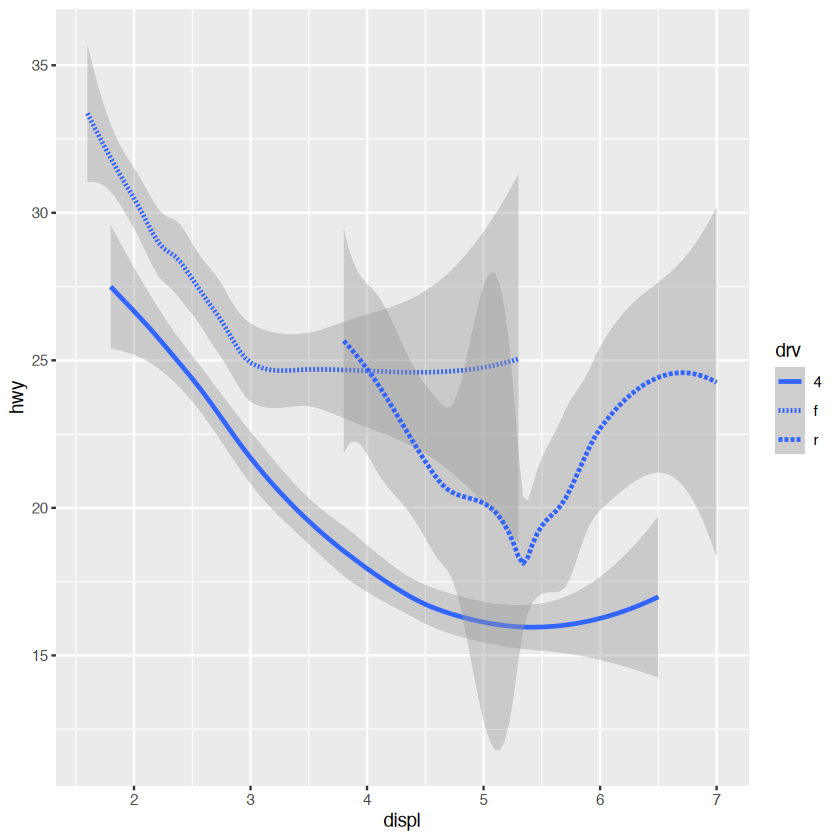

In [18]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

Here geom_smooth() separates the cars into three lines based on their drv value, which describes a car’s drivetrain. One line describes all of the points with a 4 value, one line describes all of the points with an f value, and one line describes all of the points with an r value. Here, 4 stands for four-wheel drive, f for front-wheel drive, and r for rear-wheel drive.

If this sounds strange, we can make it more clear by overlaying the lines on top of the raw data and then coloring everything according to drv.

ggplot2 provides over 30 geoms, and extension packages provide even more (see [tidyverse](http://exts.ggplot2.tidyverse.org) for a [sampling](https://exts.ggplot2.tidyverse.org/gallery/). The best way to get a comprehensive overview is the [ggplot2 cheatsheet]( http://rstudio.com/cheatsheets). To learn more about any single geom, use ```help(geom_smooth)```.

Many geoms, like geom_smooth(), use a single geometric object to display multiple rows of data. For these geoms, you can set the group aesthetic to a categorical variable to draw multiple objects. ggplot2 will draw a separate object for each unique value of the grouping variable. In practice, ggplot2 will automatically group the data for these geoms whenever you map an aesthetic to a discrete variable (as in the linetype example). It is convenient to rely on this feature because the group aesthetic by itself does not add a legend or distinguishing features to the geoms.

In [21]:
help(geom_smooth)

geom_smooth {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes() or aes_(). If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot(). A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify() for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame, and will be used as the layer data. A function can be created from a formula (e.g. ~ head(.x, 10))."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
...,"Other arguments passed on to layer(). These are often aesthetics, used to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
method,"Smoothing method (function) to use, accepts either NULL or a character vector, e.g. ""lm"", ""glm"", ""gam"", ""loess"" or a function, e.g. MASS::rlm or mgcv::gam, stats::lm, or stats::loess. ""auto"" is also accepted for backwards compatibility. It is equivalent to NULL. For method = NULL the smoothing method is chosen based on the size of the largest group (across all panels). stats::loess() is used for less than 1,000 observations; otherwise mgcv::gam() is used with formula = y ~ s(x, bs = ""cs"") with method = ""REML"". Somewhat anecdotally, loess gives a better appearance, but is O(N^2) in memory, so does not work for larger datasets. If you have fewer than 1,000 observations but want to use the same gam() model that method = NULL would use, then set method = ""gam"", formula = y ~ s(x, bs = ""cs"")."
formula,"Formula to use in smoothing function, eg. y ~ x, y ~ poly(x, 2), y ~ log(x). NULL by default, in which case method = NULL implies formula = y ~ x when there are fewer than 1,000 observations and formula = y ~ s(x, bs = ""cs"") otherwise."
se,"Display confidence interval around smooth? (TRUE by default, see level to control.)"
na.rm,"If FALSE, the default, missing values are removed with a warning. If TRUE, missing values are silently removed."
orientation,"The orientation of the layer. The default (NA) automatically determines the orientation from the aesthetic mapping. In the rare event that this fails it can be given explicitly by setting orientation to either ""x"" or ""y"". See the Orientation section for more detail."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes. It can also be a named logical vector to finely select the aesthetics to display."


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



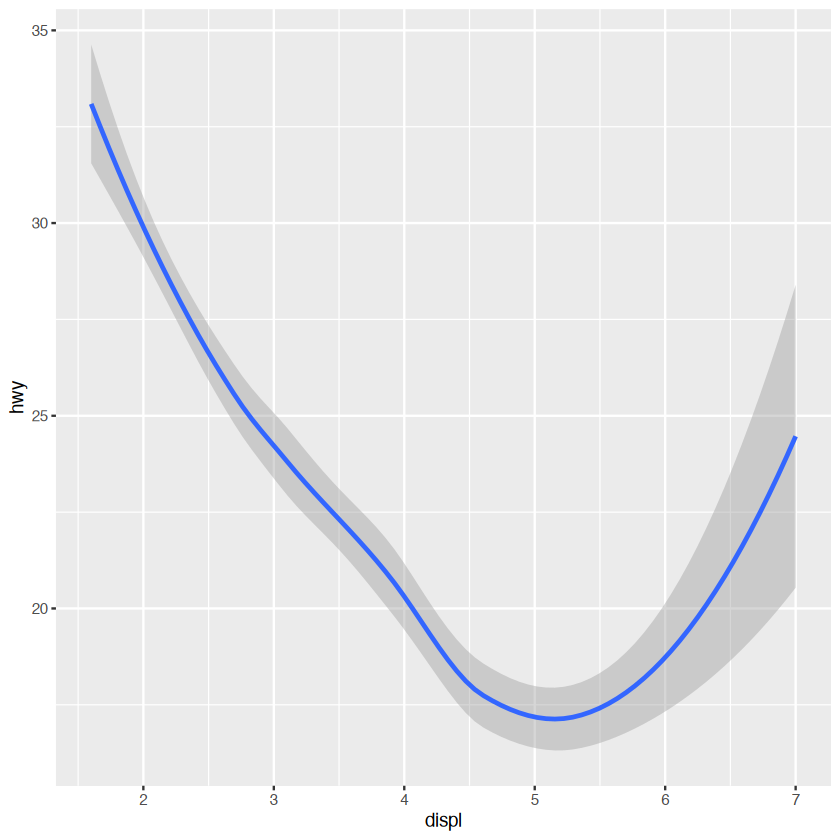

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



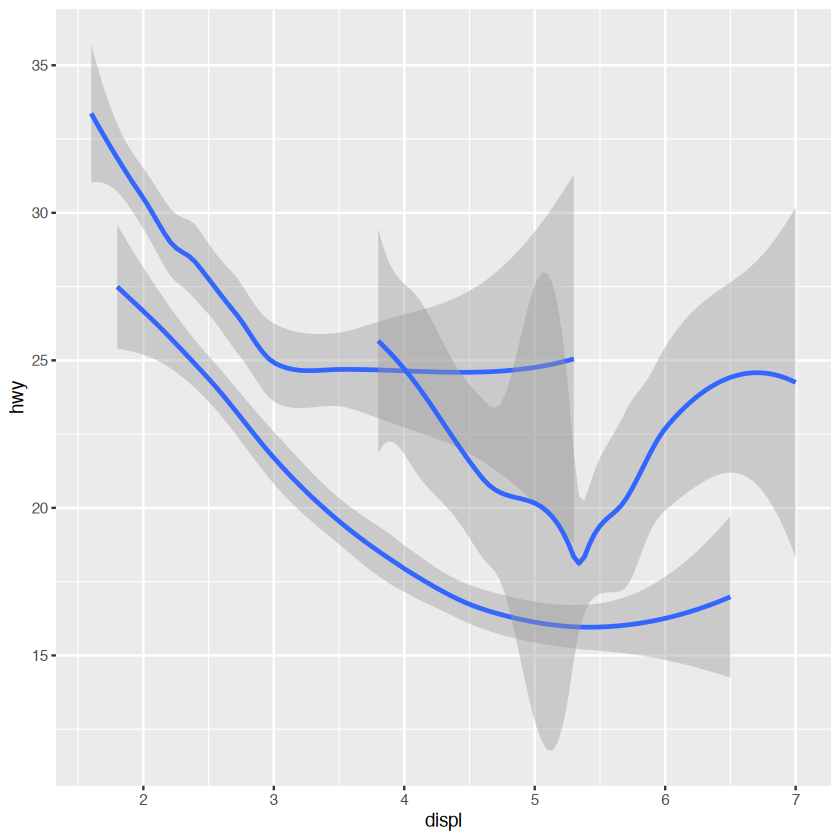

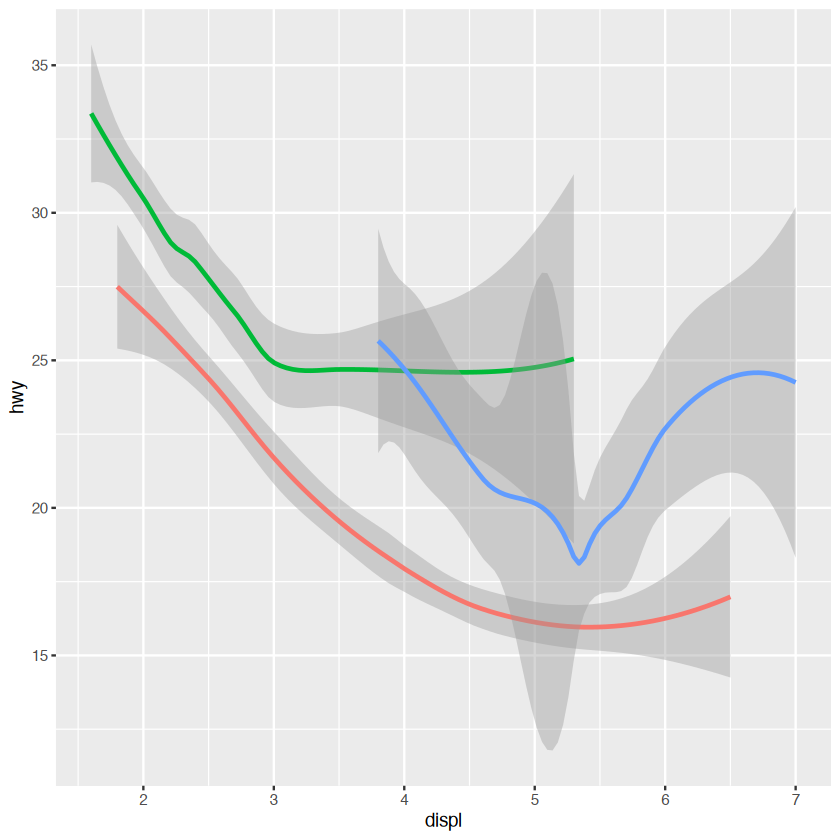

In [22]:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

ggplot(data = mpg) +
  geom_smooth(
    mapping = aes(x = displ, y = hwy, color = drv),
    show.legend = FALSE
  )

To display multiple geoms in the same plot, add multiple geom functions to ggplot():

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



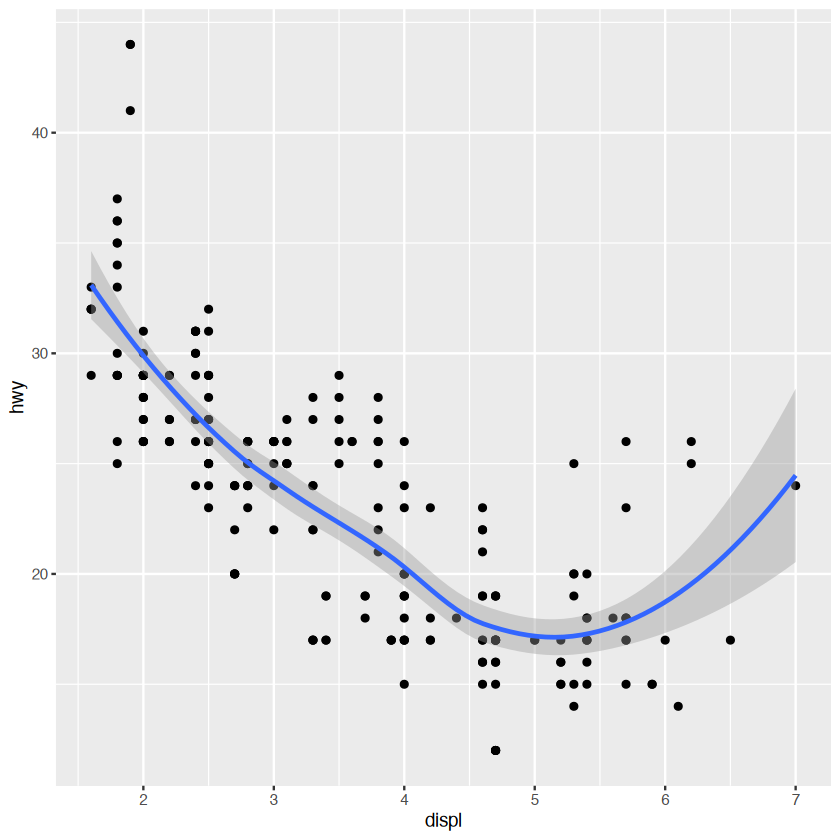

In [23]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

This, however, introduces some duplication in our code. Imagine if you wanted to change the y-axis to display cty instead of hwy. You’d need to change the variable in two places, and you might forget to update one. You can avoid this type of repetition by passing a set of mappings to ggplot(). ggplot2 will treat these mappings as global mappings that apply to each geom in the graph. In other words, this code will produce the same plot as the previous code:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



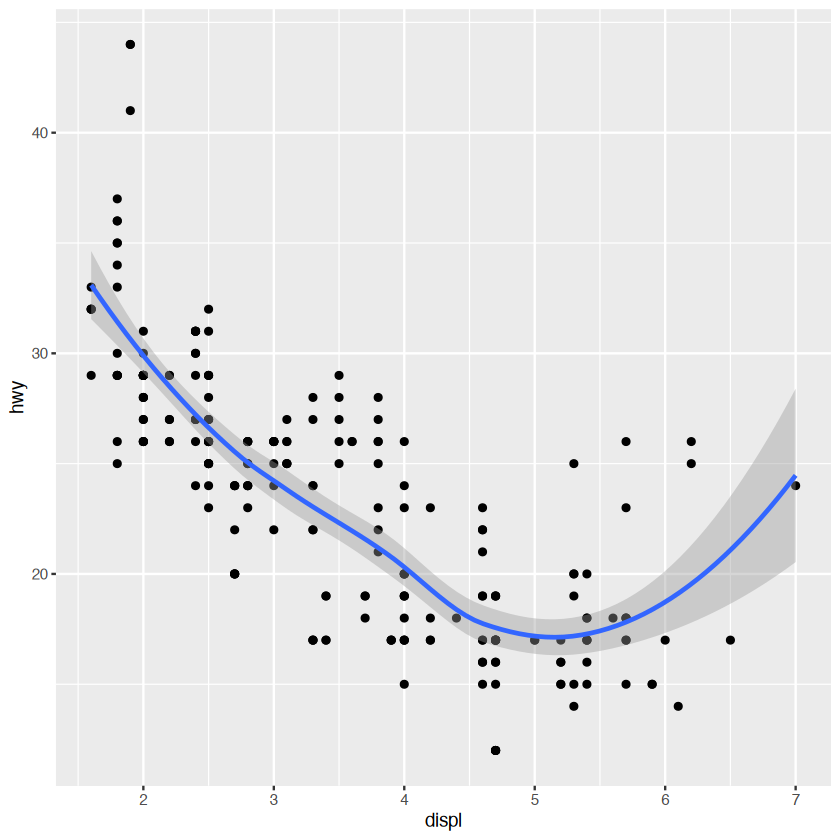

In [24]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()

If you place mappings in a geom function, ggplot2 will treat them as local mappings for the layer. It will use these mappings to extend or overwrite the global mappings for that layer only. This makes it possible to display different aesthetics in different layers:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



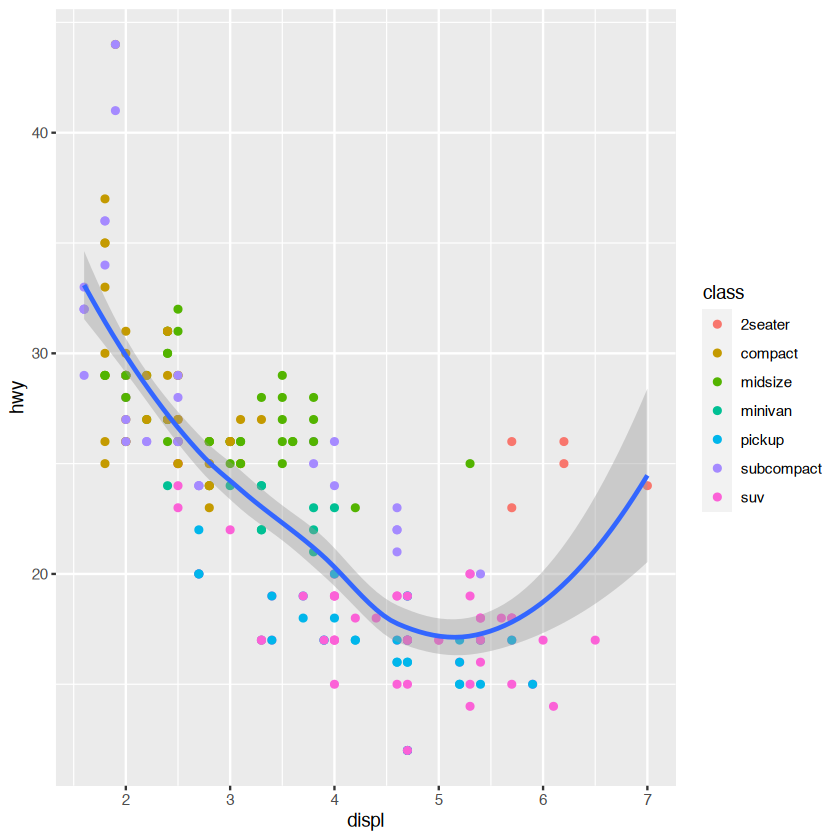

In [25]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth()

You can use the same idea to specify different data for each layer. Here, our smooth line displays just a subset of the mpg dataset, the subcompact cars. The local data argument in geom_smooth() overrides the global data argument in ggplot() for that layer only:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



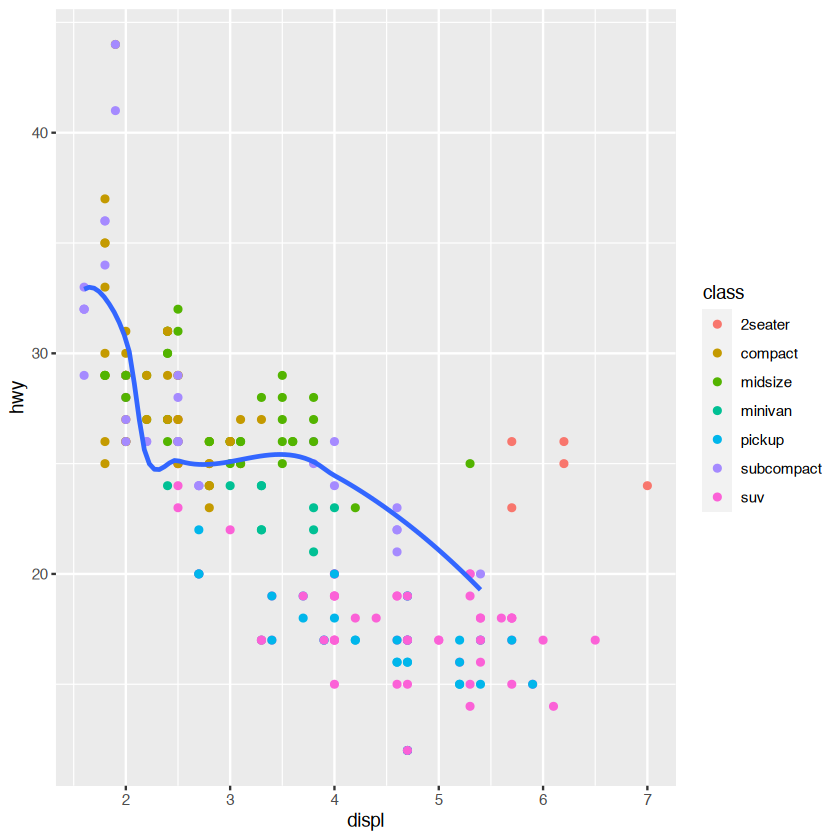

In [26]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth(
    data = filter(mpg, class == "subcompact"),
    se = FALSE
  )

## Statistical Transformations
Next, let’s take a look at a bar chart. Bar charts seem simple, but they are interesting because they reveal something subtle about plots. Consider a basic bar chart, as drawn with geom_bar(). The following chart displays the total number of diamonds in the diamonds dataset, grouped by cut. The diamonds dataset comes in ggplot2 and contains information about ~54,000 diamonds, including the price, carat, color, clarity, and cut of each diamond. The chart shows that more diamonds are available with high-quality cuts than with low quality cuts:

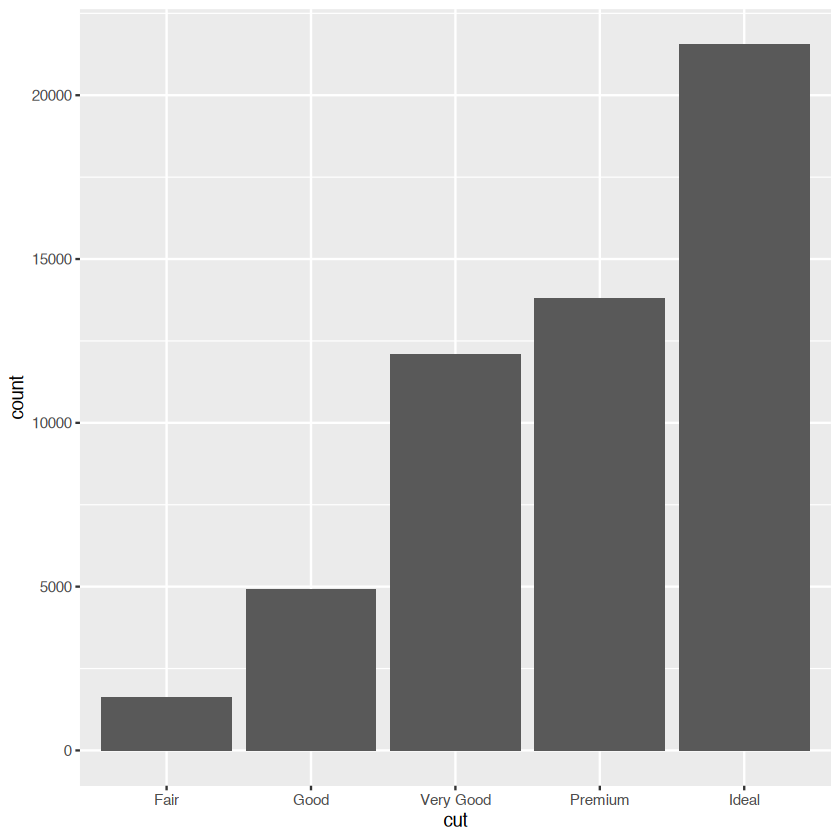

In [27]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))